In [1]:
#Importamos librerias utiles
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
#para leer las imagenes en orden alfabetico "humano"
import re
#para leer las imagenes en el path
import os

In [2]:
#funcion para convertir texto a int para ordenar las carpetas a leer
def atoi(text):
    return int(text) if text.isdigit() else text
#funcion para obtener el ordenamiento
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text)]
#creamos una lista vacia que contendra las imagenes. En cada casilla contendra un tipo de hoja, es decir.
#esta es una lista de listas
listImages = []
listImagesGris = []
#iteramos sobre el path y las carpetas con os.walk
for path, dirs, files in os.walk('./data'):
    #iteramos sobre las carpetas con nombre ordenado, leaf1, leaf2, leaf3, etc
    for dirnames in sorted(dirs, key=natural_keys):
        #definimos una lista auxiliar que contendra todas las imagenes de una carpeta especifica
        #la instruccion [...,::-1] sirve para leer la imagen en RGB y no en BGR
        auxList = [cv2.imread(file)[...,::-1] for file in glob.glob('data/'+dirnames+'/*.tif')]
        gris = [cv2.cvtColor(auxList[i], cv2.COLOR_RGB2GRAY) for i in range(len(auxList))]
        #hacemos append de dicha lista auxiliar para obtener la lista con todas las imagenes
        #de las hojas en una casilla determinada
        listImages.append(auxList)
        listImagesGris.append(gris)
#convertimos las listas en arrays de numpy para que sea mas manejable
listImages = np.array(listImages)
listImagesGris = np.array(listImagesGris)

## El siguiente codigo es para segmentar, se hace una prueba con una sola imagen

El array de imagenes a color tiene un shape de: (15, 75)
El array de imagenes a blanco y negro tiene un shape de: (15, 75)


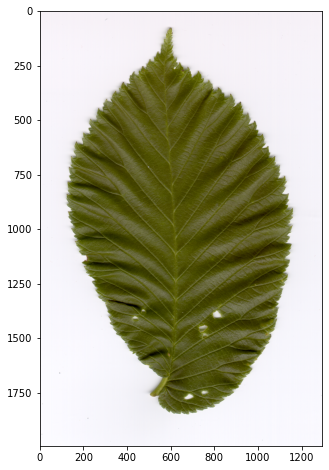

In [3]:
#imprimimos el shape de ambos arrays:
print('El array de imagenes a color tiene un shape de: '+str(listImages.shape))
print('El array de imagenes a blanco y negro tiene un shape de: '+str(listImagesGris.shape))
#mostramos la imagen de prueba
plt.figure(figsize = (8,8))
plt.imshow(listImages[0,2])
plt.show()

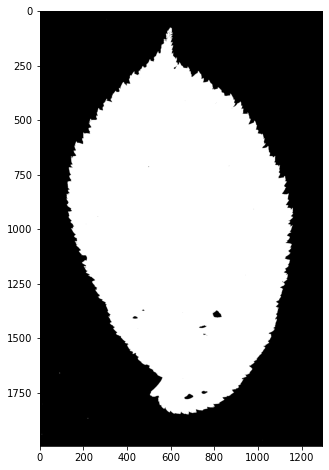

In [4]:
#aplicamos la tecnica de otsu para obtener la mascara de la hoja
ret, thresh1 = cv2.threshold(listImagesGris[0,2], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#mostramos el resultado
plt.figure(figsize = (8,8))
plt.imshow(thresh1,cmap='gray')
plt.show()

## Fin del codigo de prueba

In [5]:
#para obtener las mascaras hay que hacer un ciclo for y realizar el metodo de otsu para cada imagen.
mascaras = []
auxList = []
for tipo in range(listImages.shape[0]):
    auxList = []
    for imagen in range(listImages.shape[1]):
        ret, mascara = cv2.threshold(listImagesGris[tipo,imagen], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        auxList.append(mascara)
    mascaras.append(auxList)
mascaras = np.array(mascaras)

In [6]:
#funcion para mostrar n imagenes
def muestraImagenes(imagen, filas, columnas):
    plt.figure(figsize = (16,16))
    for i in range (filas*columnas):
        plt.subplot(filas, columnas, i + 1)
        plt.imshow(imagen[i], cmap='gray')
        plt.title('Imagen %d' %i)
        plt.xticks(())
        plt.yticks(())

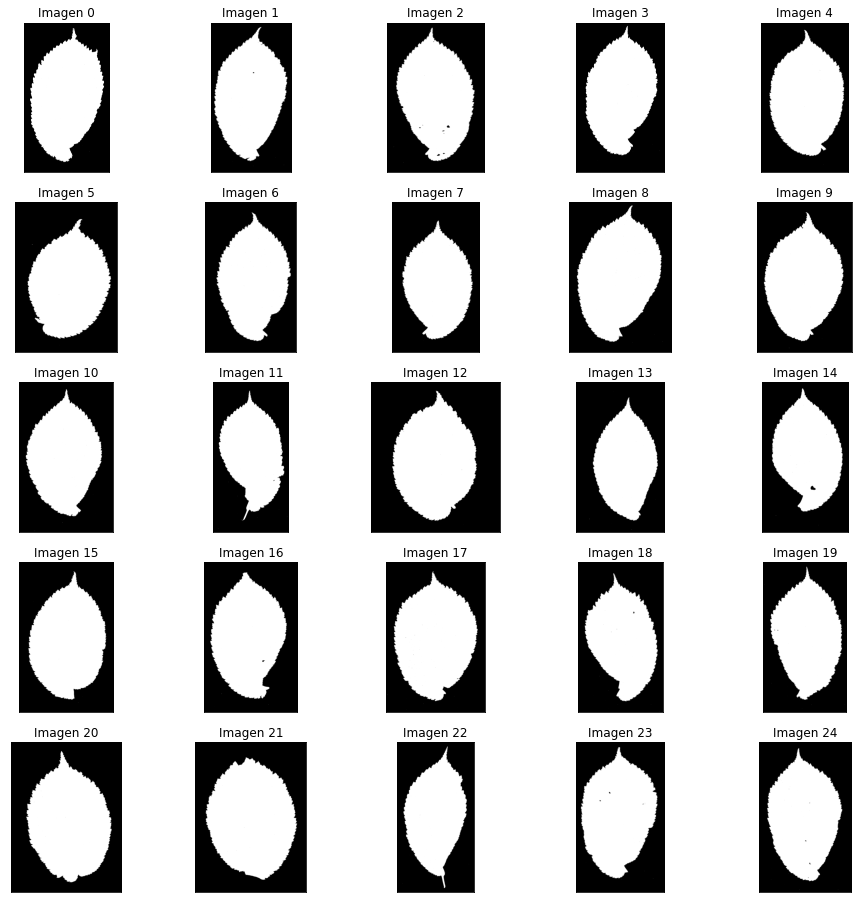

In [7]:
#mostramos el resultado de las primeras 25 mascaras para el tipo de hoja 1 (leaf1)
muestraImagenes(mascaras[0,:25],5,5)

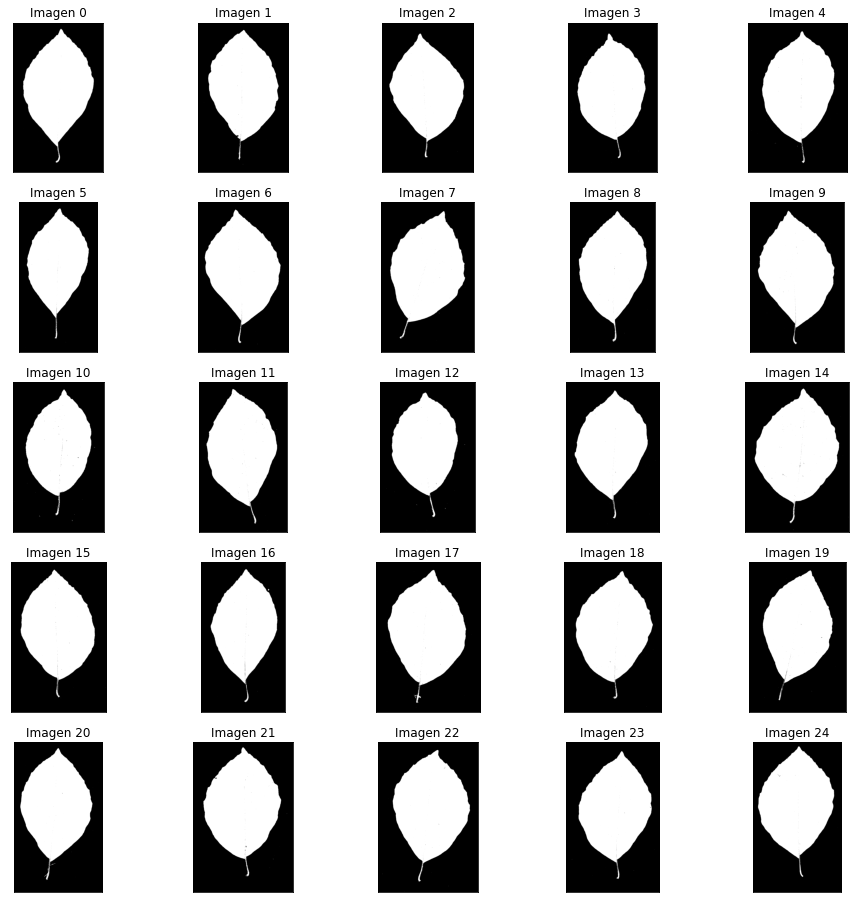

In [8]:
#mostramos el resultado de las primeras mascaras para el tipo de hoja 1 (leaf1)
muestraImagenes(mascaras[14,:25],5,5)

## Dado que el conjunto de imagenes es uniforme, al observar estos dos resultados podemos suponer que todas las mascaras son similares, es decir, la segmentacion se hace correctamente.

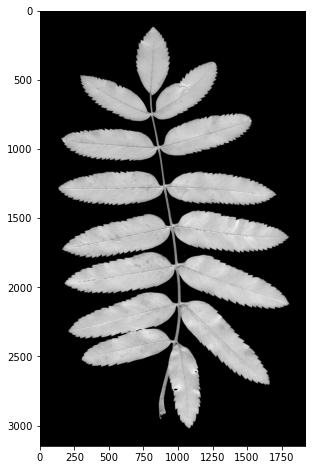

In [9]:
#para segmentar debemos multiplicar la imagen en escala de gris con su respectiva
#mascara, esto se hace para una sola imagen, posteriormente se hará para todas
d = mascaras[9,15]*listImagesGris[9,15]
#mostramos el resultado de la segmentacion
plt.figure(figsize = (8,8))
plt.imshow(d,cmap='gray')
plt.show()

In [11]:
#creamos el directorio mascaras si es que no existe
if not os.path.exists('mascaras'):
    os.mkdir('mascaras')
if not os.path.exists('binarios'):
    os.mkdir('binarios')
#iteramos sobre todas las imagenes
for tipo in range(listImages.shape[0]):
    for imagen in range(listImages.shape[1]):
        #creamos una imagen auxiliar que sera la mascara de la imagen en turno,
        #tal y como se hizo en la celda anterior
        auxImage = mascaras[tipo,imagen]*listImagesGris[tipo,imagen]
        #definimos el path donde guardaremos cada images
        path = 'mascaras/tipo'+str(tipo)+'/'
        #si dicha carpeta en dicho path no existe, entonces creala
        if not os.path.exists(path):
            os.mkdir(path)
        #guarda la imagen en turno en su respectivo path
        cv2.imwrite(path+str(imagen)+'.png', auxImage)
        path1 = 'binarios/tipo'+str(tipo)+'/'
        #si dicha carpeta en dicho path no existe, entonces creala
        if not os.path.exists(path1):
            os.mkdir(path1)
        cv2.imwrite(path1+str(imagen)+'.png', mascaras[tipo,imagen])